In [1]:
import pandas as pd 
import numpy as np

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


In [39]:
df = pd.read_csv(r"c:\Users\Admin\Documents\DataSets\covid data.csv")

In [33]:
df.head()

,Age,Gender,Fever,Cough,City,Has_Covid
0,61,Male,NaN,strong,Solapur,no
1,24,Female,96.0,mild,Thane,no
2,70,Male,100.0,mild,Thane,no
3,30,Male,NaN,mild,Solapur,no
4,33,Female,103.0,mild,Mumbai,yes


In [34]:
df['City'].value_counts()

City
Aurangabad    18
Solapur       17
Nashik        14
Pune          12
Mumbai        11
Thane         11
Nagpur         9
Kolhapur       8
Name: count, dtype: int64

In [35]:
df.isnull().sum()

Age           0
Gender        0
Fever        10
Cough         0
City          0
Has_Covid     0
dtype: int64

In [40]:
#Applying simple imputer on col Fever
si = SimpleImputer()
df['Fever'] = si.fit_transform(df[['Fever']])

#Applying OrdinalEncoder on col cough
oe = OrdinalEncoder(categories = [['mild','strong']])
df['Cough']=oe.fit_transform(df[['Cough']])

#Applying one hot endoding on col 
df =pd.get_dummies(df,columns=['Gender','City'],drop_first=True)



In [41]:
df.head()

,Age,Fever,Cough,Has_Covid,Gender_Male,City_Kolhapur,City_Mumbai,City_Nagpur,City_Nashik,City_Pune,City_Solapur,City_Thane
0,61,99.7,1.0,no,True,False,False,False,False,False,True,False
1,24,96.0,0.0,no,False,False,False,False,False,False,False,True
2,70,100.0,0.0,no,True,False,False,False,False,False,False,True
3,30,99.7,0.0,no,True,False,False,False,False,False,True,False
4,33,103.0,0.0,yes,False,False,True,False,False,False,False,False


In [43]:
df.shape

(100, 12)

In [44]:
df['Fever'].isnull().sum()

np.int64(0)

In [45]:
df['Cough'] # mild :0 , strong :1

0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    1.0
97    0.0
98    1.0
99    0.0
Name: Cough, Length: 100, dtype: float64

In [46]:
corr = df['Age'].corr(df['Fever'])  #syntax for correlation between two attributes 

In [47]:
corr

np.float64(0.1334839381092923)

In [48]:
df['Has_Covid'] = df['Has_Covid'].replace({'yes':1,'no':0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_1184\691013974.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has_Covid'] = df['Has_Covid'].replace({'yes':1,'no':0})


In [49]:
df.head()

,Age,Fever,Cough,Has_Covid,Gender_Male,City_Kolhapur,City_Mumbai,City_Nagpur,City_Nashik,City_Pune,City_Solapur,City_Thane
0,61,99.7,1.0,0,True,False,False,False,False,False,True,False
1,24,96.0,0.0,0,False,False,False,False,False,False,False,True
2,70,100.0,0.0,0,True,False,False,False,False,False,False,True
3,30,99.7,0.0,0,True,False,False,False,False,False,True,False
4,33,103.0,0.0,1,False,False,True,False,False,False,False,False


# IMPORTANT !!

In [50]:
corr_matrix = df.corr(numeric_only=True)

In [51]:
corr_matrix['Has_Covid'].sort_values(ascending=False)

Has_Covid        1.000000
Cough            0.492366
Fever            0.386723
Age              0.152993
City_Nagpur      0.067579
City_Nashik      0.067348
City_Mumbai      0.054084
City_Kolhapur    0.038614
City_Pune       -0.044635
City_Solapur    -0.081519
City_Thane      -0.139073
Gender_Male     -0.166132
Name: Has_Covid, dtype: float64

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

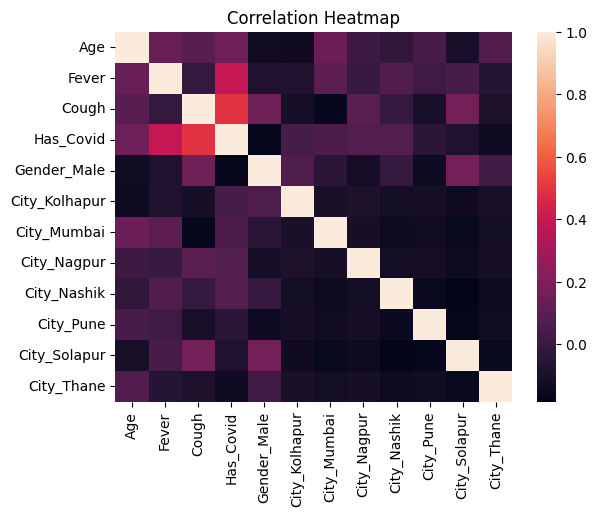

In [55]:
# Heatmap for correlation
sns.heatmap(corr_matrix)
plt.title("Correlation Heatmap")
plt.show()


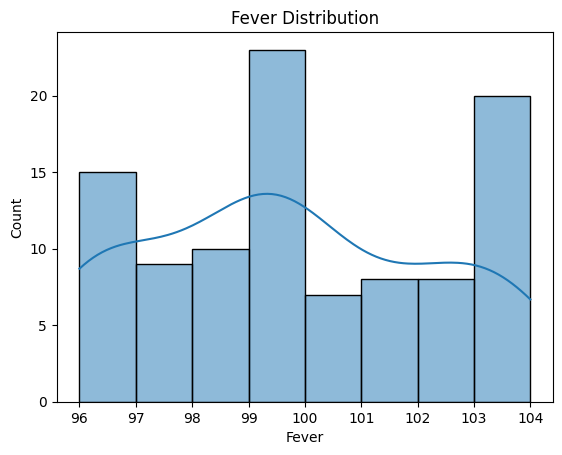

In [56]:
# Distribution of fever
sns.histplot(df['Fever'], kde=True)
plt.title("Fever Distribution")
plt.show()

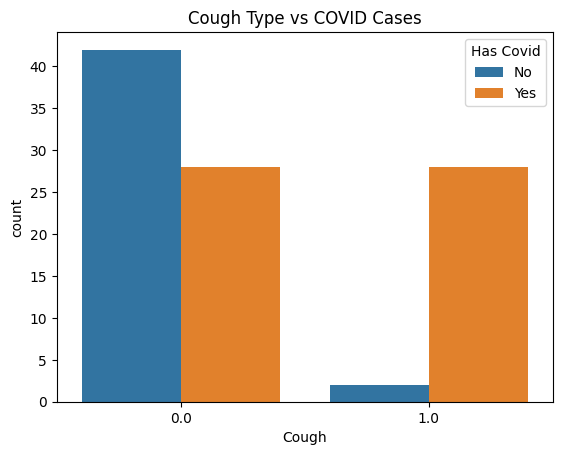

In [62]:
# countplot between cough and has_covid
sns.countplot(x='Cough', hue='Has_Covid', data=df)
plt.legend(title='Has Covid', labels=['No', 'Yes'])
plt.title("Cough Type vs COVID Cases")
plt.show()